# Individual Planning Report


## (1) Data Description 

CSV File #1: **players.csv**
This file sumamrizes individual Minecraft players from UBC's PLAI group using the variables: experience, type, newsletter subscritpion status, hashed email, hours played, name, gender, and age. 
|Variable | Type | Description|
| --------|------|-------------|
|Experience| Factor| Player self-identified skill group|
|Subscribe | Factor| Newsletter sign-up (True/False)|
|HashedEmail| String| Pseudonymized unique player indentifier|
|Playedhours| Numeric| Total hours played|
|Name| String| Player name (pseudonyms)|
|Gender| Factor| Gender identity|
|Age|Numeric| Age in years| 

Issues and limitations in this dataset: 


## (2) Questions 


**Broad Question:** What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various palyer types? 

**More specific second question/ follow up:** Can played hours, player experience, gender, and age be used to predict who would subscribe to the newsletter? 

## (3) Exploratory Data Analysis and Visualizations 

(3.1) Loading the libraries and datasets: 

In [1]:
#Libraries
library(tidyverse)
library(caret) 
library(gridExtra) 
library(repr)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [6]:
players <- read.csv("players.csv") 
players

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<int>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


In [7]:
#Inspecting Data
str(players)
summary(players)
colSums(is.na(players))
head(players)

'data.frame':	196 obs. of  7 variables:
 $ experience  : chr  "Pro" "Veteran" "Veteran" "Amateur" ...
 $ subscribe   : logi  TRUE TRUE FALSE TRUE TRUE TRUE ...
 $ hashedEmail : chr  "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d" "f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9" "b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28" "23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5" ...
 $ played_hours: num  30.3 3.8 0 0.7 0.1 0 0 0 0.1 0 ...
 $ name        : chr  "Morgan" "Christian" "Blake" "Flora" ...
 $ gender      : chr  "Male" "Male" "Male" "Female" ...
 $ Age         : int  9 17 17 21 21 17 19 21 47 22 ...


  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

experience    subscribe  hashedEmail played_hours         name       gender 
           0            0            0            0            0            0 
         Age 
           2

,experience,subscribe,hashedEmail,played_hours,name,gender,Age
,<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<int>
1,Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
2,Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
3,Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
4,Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
5,Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
6,Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [11]:
#Cleaning data
players_tidy <- players|>
    mutate(subscribe=as.factor(subscribe),
           experience = as.factor(experience),
           gender =as.factor(gender))|>
    select(played_hours,experience, gender, Age, subscribe) 
#remove N/as 
players_cleaned <- na.omit(players_tidy) 
players_cleaned 

,played_hours,experience,gender,Age,subscribe
,<dbl>,<fct>,<fct>,<int>,<fct>
1,30.3,Pro,Male,9,TRUE
2,3.8,Veteran,Male,17,TRUE
3,0.0,Veteran,Male,17,FALSE
4,0.7,Amateur,Female,21,TRUE
5,0.1,Regular,Male,21,TRUE
6,0.0,Amateur,Female,17,TRUE
7,0.0,Regular,Female,19,TRUE
8,0.0,Amateur,Male,21,FALSE
9,0.1,Amateur,Male,47,TRUE


In [12]:
#Summary table of means 
players_cleaned |>
summarise(Mean_played_hours = round(mean(played_hours),2), 
          Mean_Age = round(mean(Age),2))


Mean_played_hours,Mean_Age
<dbl>,<dbl>
5.9,21.14


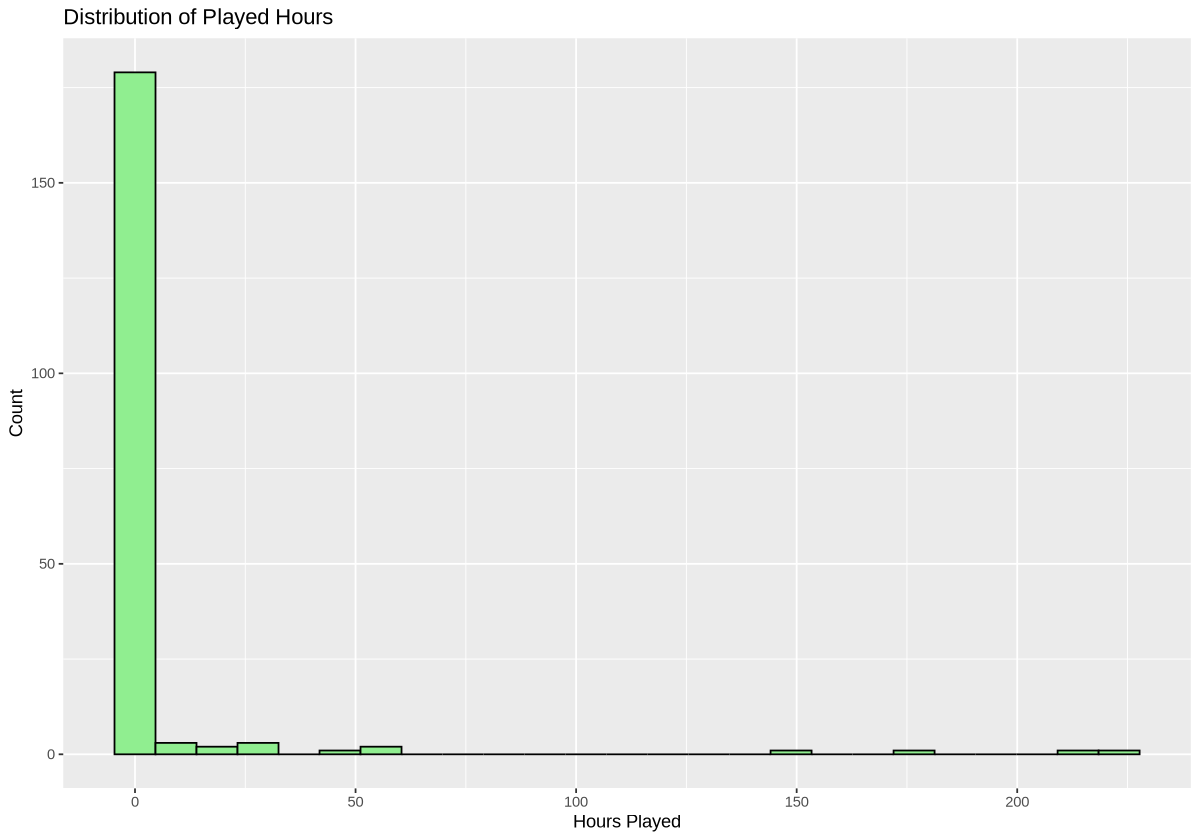

In [13]:
#PLOTS!
#plot one, histogram of played hours, plot1
options(repr.plot.width =10, repr.plot.height = 7)
plot1 <- ggplot(players_cleaned, aes(played_hours))+
            geom_histogram(bins=25, fill= "lightgreen", color ="black")+
            labs(title= "Distribution of Played Hours" , x= "Hours Played", y= "Count")
plot1



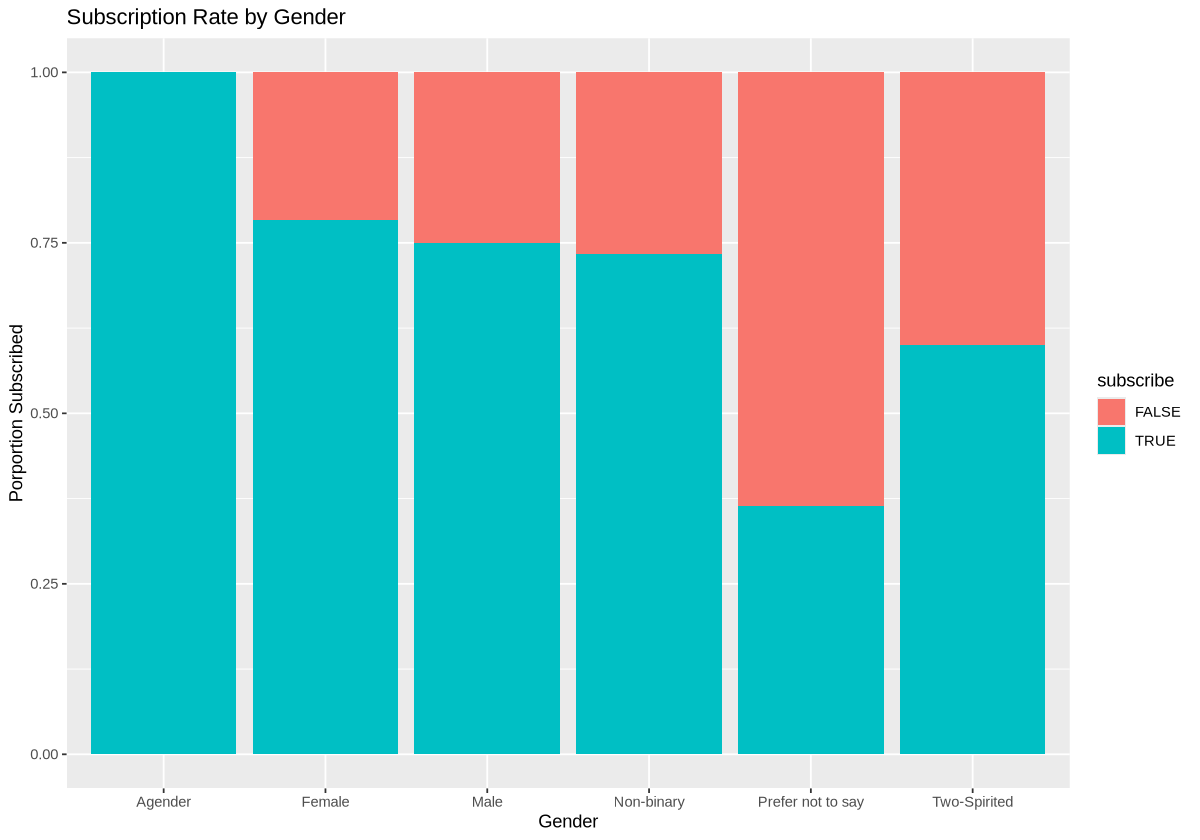

In [14]:
#PLOT 2: subscription by gender
options(repr.plot.width =10, repr.plot.height= 7)
plot2 <- ggplot(players_cleaned, aes(gender, fill=subscribe))+
            geom_bar(position="fill") +
            labs(title= "Subscription Rate by Gender", x= "Gender",
                 y="Porportion Subscribed")
plot2


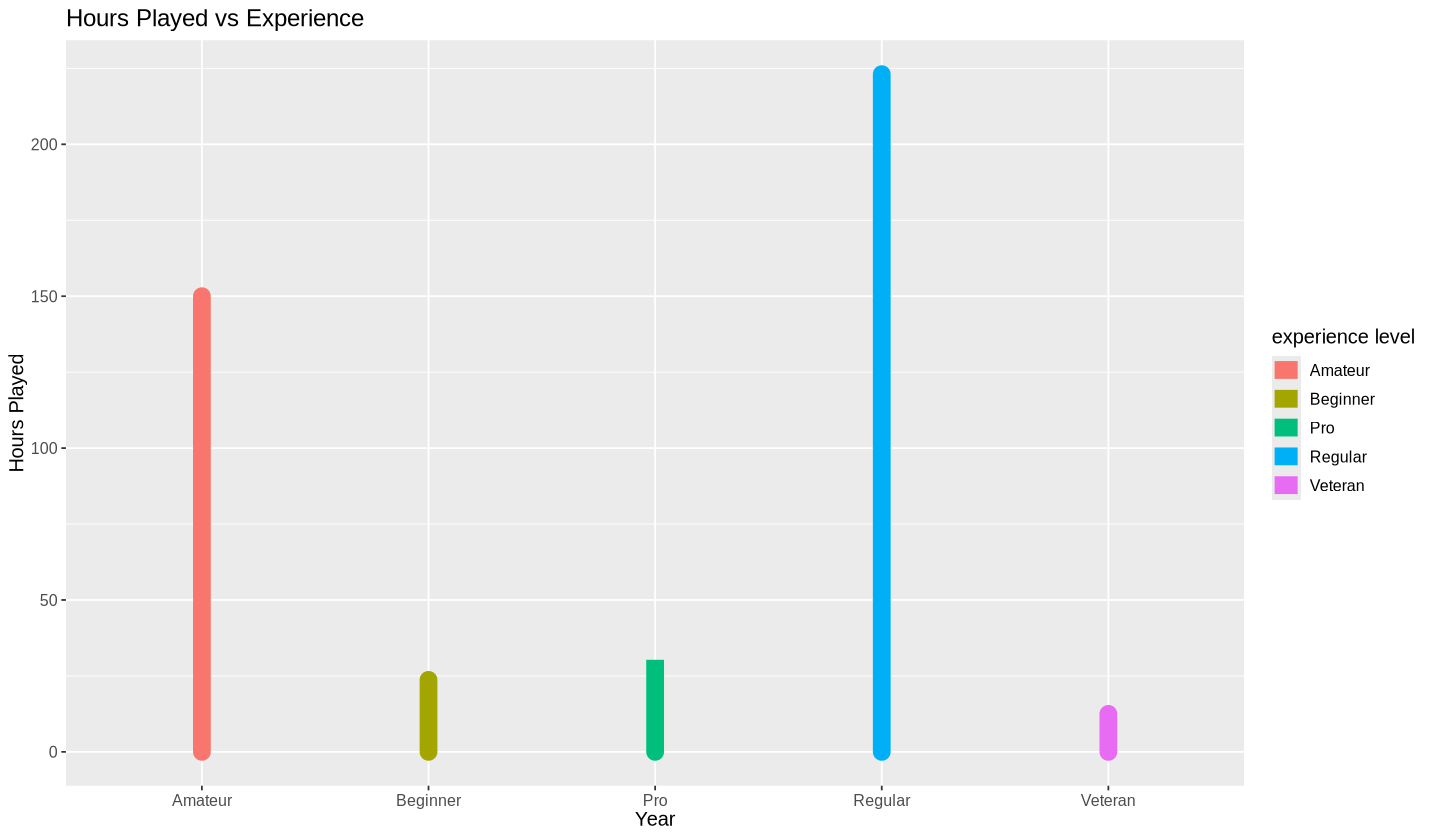

In [16]:
options(repr.plot.width = 12, repr.plot.height =7 ) 
plot3 <- players_cleaned|>
ggplot(aes(x = experience, y = played_hours)) +
geom_line(linewidth = 5, aes(colour =  experience)) + 
           labs(x= "Year", y = "Hours Played", colour = "experience level", title= "Hours Played vs Experience") +
                       theme(text = element_text(size = 12))
plot3

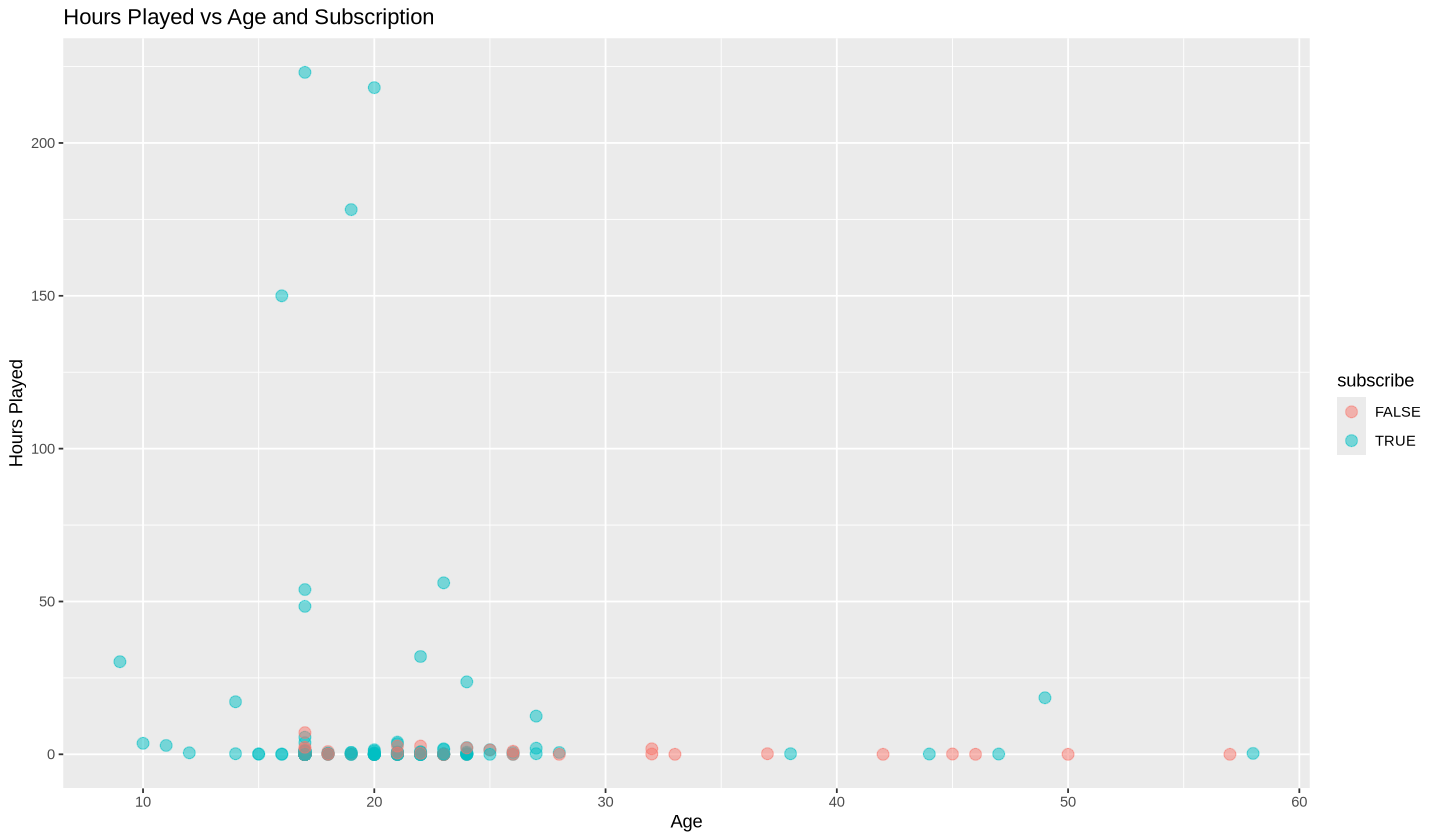

In [39]:
#plot4, age vs hours played, scatterplot
options(reper.plot.width=12, repr.plot.height =7)
plot4<- players_cleaned|>
        ggplot(aes(x= Age, y = played_hours, fill= subscribe))+
        geom_point(alpha=0.5,size=3, aes(color=subscribe))+
        labs(title= "Hours Played vs Age and Subscription Status", x="Age", y= "Hours Played")
plot4

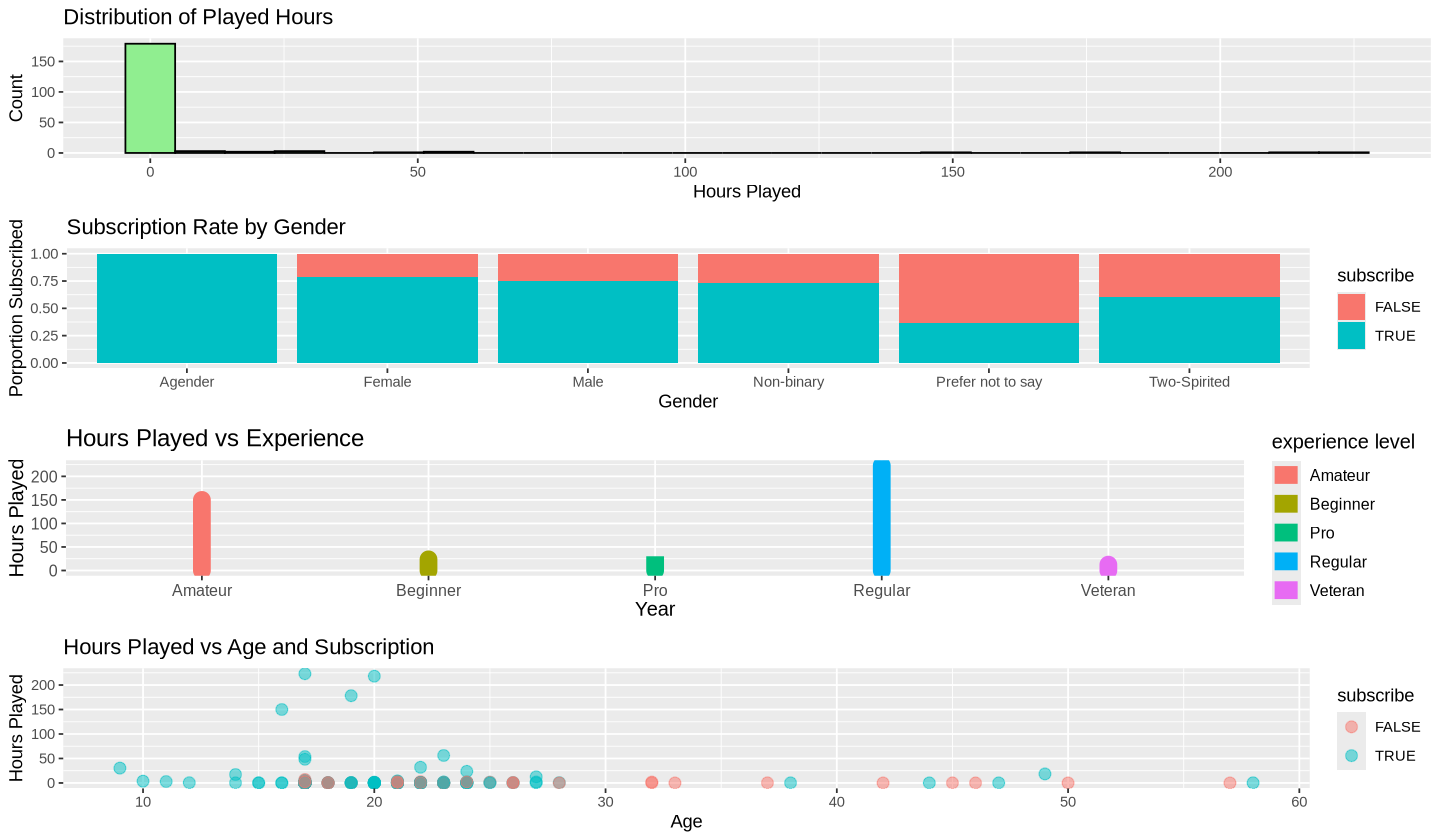

In [40]:
#side by side graph comparison:
grid.arrange(plot1, plot2, plot3, plot4, ncol=1)

## (4) Methods and (Proposed) Planning 